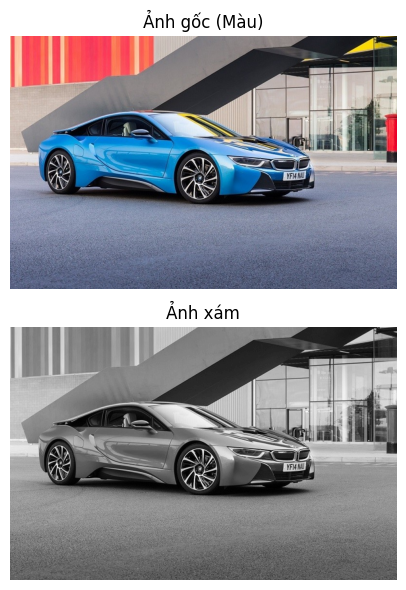

In [27]:
import cv2
import matplotlib.pyplot as plt

# Đường dẫn tới ảnh
image_path = r"C:\Users\nguye\PycharmProjects\openCVtest2\notebook\car.jpg"

# Đọc ảnh bằng OpenCV
img_color = cv2.imread(image_path)

# Kiểm tra xem ảnh có đọc được không
if img_color is None:
    print("Không tìm thấy ảnh. Vui lòng kiểm tra lại đường dẫn:", image_path)
else:
    # Chuyển ảnh từ BGR sang RGB để hiển thị đúng màu
    img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

    # Chuyển ảnh sang ảnh xám
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    # Hiển thị ảnh gốc và ảnh xám
    plt.figure(figsize=(12, 6))

    # Hiển thị ảnh gốc (màu)
    plt.subplot(121)
    plt.imshow(img_rgb)
    plt.title('Ảnh gốc (Màu)')
    plt.axis('off')

    # Hiển thị ảnh xám
    plt.subplot(222)
    plt.imshow(img_gray, cmap='gray')
    plt.title('Ảnh xám')
    plt.axis('off')

    # Hiển thị tất cả
    plt.tight_layout()
    plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Đường dẫn tới ảnh
image_path = r"C:\Users\nguye\PycharmProjects\openCVtest2\notebook\car.jpg"
print(image_path)

# Đọc ảnh bằng OpenCV
img_color = cv2.imread(image_path)

# Kiểm tra xem ảnh có đọc được không
if img_color is None:
    print("Không tìm thấy ảnh. Vui lòng kiểm tra lại đường dẫn:", image_path)
else:
    # Chuyển ảnh sang ảnh xám
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    # Tính histogram
    hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

    # Hiển thị ảnh gốc và histogram
    plt.figure(figsize=(12, 6))

    # Hiển thị ảnh gốc
    plt.subplot(131)
    plt.imshow(img_color)
    plt.title('Ảnh gốc (Màu)')
    plt.axis('off')
    
    # Hiển thị ảnh xám
    plt.subplot(132)  # Tạo ô bên trái
    plt.imshow(img_gray, cmap='gray')
    plt.title('Ảnh xám')
    plt.axis('off')

    # Tính giá trị lớn nhất của histogram
    hist_max = np.max(hist)

    # Chuẩn hóa histogram
    hist_normalized = hist / hist_max

    # Hiển thị histogram đã chuẩn hóa
    plt.subplot(133)  # Tạo ô bên phải
    plt.bar(range(256), hist_normalized.ravel(), width=1)
    plt.title('Histogram (Chuẩn hóa)')
    plt.xlabel('Giá trị pixel')
    plt.ylabel('Tỷ lệ số lượng pixel')
    plt.xlim([0, 256])

    # Hiển thị cả hai biểu đồ
    plt.tight_layout()  # Sắp xếp bố cục
    plt.show()


# II. Phần 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure


X1 = np.array([
    [52, 55, 61, 66, 70, 61, 64, 73],
    [63, 59, 55, 90, 109, 85, 69, 72],
    [62, 59, 68, 113, 144, 104, 66, 73],
    [63, 58, 71, 122, 154, 106, 70, 69],
    [67, 61, 68, 104, 126, 88, 68, 70],
    [79, 65, 60, 70, 77, 68, 58, 75],
    [85, 71, 64, 59, 55, 61, 65, 83],
    [87, 79, 69, 68, 65, 76, 78, 94]
], dtype=np.uint8)

X2 = np.array([
    [19, 17, 2, 1, 1, 2, 2, 1],
    [18, 19, 19, 17, 1, 1, 1, 1],
    [17, 18, 19, 17, 1, 2, 1, 1],
    [18, 19, 19, 19, 19, 1, 1, 2],
    [18, 19, 19, 18, 17, 2, 3, 3],
    [19, 19, 19, 18, 18, 2, 2, 1],
    [19, 19, 18, 18, 17, 1, 2, 1],
    [18, 19, 18, 17, 3, 1, 1, 3]
], dtype=np.uint8)

X3 = np.array([
    [1, 97, 98, 1, 1, 2, 2, 1],
    [1, 99, 99, 4, 1, 211, 202, 1],
    [2, 98, 99, 4, 1, 2, 2, 2],
    [1, 99, 99, 3, 3, 1, 98, 99],
    [1, 99, 99, 3, 2, 99, 98, 98],
    [1, 99, 99, 99, 99, 97, 99, 1],
    [2, 99, 98, 97, 99, 2, 1, 1],
    [1, 1, 1, 97, 98, 1, 1, 3]
], dtype=np.uint8)

print("Matrix X1:", X1)
print("Matrix X2:", X2)
print("Matrix X3:", X3)

## II.3 Histogram

In [ ]:

# Vẽ histogram của X1 và X2
plt.figure(figsize=(6, 3))

# Histogram cho X1
plt.subplot(1, 2, 1)
plt.hist(X1.ravel(), bins=256, range=(0, 255), color='gray')
plt.title('Histogram của X1')
plt.xlabel('Mức xám')
plt.ylabel('Số lượng pixel')

# Histogram cho X2
plt.subplot(1, 2, 2)
plt.hist(X2.ravel(), bins=256, range=(0, 255), color='gray')
plt.title('Histogram của X2')
plt.xlabel('Mức xám')
plt.ylabel('Số lượng pixel')

plt.tight_layout()
plt.show()

# Cân bằng histogram cho X2
X2_equalized = exposure.equalize_hist(X2)

# Vẽ histogram sau khi cân bằng
plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
plt.imshow(X2, cmap='gray')
plt.title('Ảnh X2 gốc')

plt.subplot(1, 2, 2)
plt.imshow(X2_equalized, cmap='gray')
plt.title('Ảnh X2 sau khi cân bằng Histogram')

plt.tight_layout()
plt.show()

# Histogram sau khi cân bằng
plt.figure(figsize=(3, 3))
plt.hist(X2_equalized.ravel(), bins=256, range=(0, 1), color='gray')
plt.title('Histogram sau khi cân bằng của X2')
plt.xlabel('Mức xám (Sau khi cân bằng)')
plt.ylabel('Số lượng pixel')
plt.show()


## II.4 Lọc tuyến tính:

### II.4.1. Lọc thông thấp (Low Pass Filter: Smoothing)
mask lọc trung bình  
lọc gaussian

In [ ]:
from scipy.ndimage import convolve

# Mask lọc trung bình
average_filter = np.ones((3, 3)) / 9

# Lọc trung bình
X2_average_filtered = convolve(X2, average_filter)
print("# X2 ban đầu \n", X2)
print("# Lọc trung bình \n", X2_average_filtered)

In [ ]:
plt.subplot(1, 3, 1)
plt.imshow(X2, cmap='gray')
plt.title('Ảnh X2 gốc')

plt.subplot(1, 3, 2)
plt.imshow(X2_average_filtered, cmap='gray')
plt.title('Lọc trung bình trên X2')

from scipy.ndimage import gaussian_filter

# Lọc Gaussian
X2_gaussian_filtered = gaussian_filter(X2, sigma=1)
plt.subplot(1, 3, 3)
plt.imshow(X2_gaussian_filtered, cmap='gray')
plt.title('Lọc Gaussian trên X2')
plt.show()



### II.4.2. Lọc thông cao (High pass filter):
#### Lọc làm sắc nét

In [ ]:
# Mask lọc làm sắc nét (Sharpening filter)
sharpening_filter = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Lọc làm sắc nét
from scipy.ndimage import convolve
X2_sharpened = convolve(X2, sharpening_filter)

plt.imshow(X2_sharpened, cmap='gray')
plt.title('Lọc làm sắc nét trên X2')
plt.show()

#### Lọc đạo hàm  
sobel

In [ ]:
from scipy.ndimage import sobel

# Lọc Sobel theo hướng x
sobel_x = sobel(X2, axis=0)

# Lọc Sobel theo hướng y
sobel_y = sobel(X2, axis=1)

# Tổng gradient của Sobel
sobel_total = np.hypot(sobel_x, sobel_y)

# Hiển thị kết quả
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(X2, cmap='gray')
plt.title('Ảnh X2 gốc')

plt.subplot(2, 2, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Lọc Sobel theo hướng x')

plt.subplot(2, 2, 3)
plt.imshow(sobel_y, cmap='gray')  

plt.title('Lọc Sobel theo hướng y')

plt.subplot(2, 2, 4)
plt.imshow(sobel_total, cmap='gray')
plt.title('Tổng gradient Sobel')

plt.tight_layout()
plt.show()


laplace

In [ ]:
from scipy.ndimage import laplace

# Lọc Laplace
laplace_filtered = laplace(X2)

# Hiển thị kết quả
plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
plt.imshow(X2, cmap='gray')
plt.title('Ảnh X2 gốc')
plt.subplot(1, 2, 2)
plt.imshow(laplace_filtered, cmap='gray')
plt.title('Lọc Laplace trên X2')
plt.show()


## II.5 Lọc không tuyến tính
### II.5.1 Lọc trung vị (Median filter)
Lọc min max

In [ ]:
from scipy.ndimage import median_filter, minimum_filter, maximum_filter

# Lọc trung vị
X2_median = median_filter(X2, size=3)

# Lọc Min
X2_min = minimum_filter(X2, size=3)

# Lọc Max
X2_max = maximum_filter(X2, size=3)

# Hiển thị kết quả
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(X2, cmap='gray')
plt.title('Ảnh X2 gốc')

plt.subplot(2, 2, 2)
plt.imshow(X2_median, cmap='gray')
plt.title('Lọc trung vị')

plt.subplot(2, 2, 3)
plt.imshow(X2_min, cmap='gray')
plt.title('Lọc Min')

plt.subplot(2, 2, 4)
plt.imshow(X2_max, cmap='gray')
plt.title('Lọc Max')

plt.tight_layout()
plt.show()

# In ra một phần của ma trận gốc và các ma trận sau khi lọc để so sánh
print("Ma trận X2 gốc:")
print(X2[:4, :4])

print("\nMa trận sau khi lọc trung vị:")
print(X2_median[:4, :4])

print("\nMa trận sau khi lọc Min:")
print(X2_min[:4, :4])

print("\nMa trận sau khi lọc Max:")
print(X2_max[:4, :4])

## II. 6 Ảnh nhị phân và xử lý ảnh nhị phân:

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Nhị phân hóa với ngưỡng 100
_, binary_image = cv2.threshold(X2, 100, 1, cv2.THRESH_BINARY)

# Tạo bộ lọc 3x3
kernel = np.ones((3, 3), np.uint8)

# Áp dụng các phép lọc
erosion = cv2.erode(binary_image, kernel, iterations=1)     # Co
dilation = cv2.dilate(binary_image, kernel, iterations=1)   # Giãn
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)  # Đóng
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)   # Mở

# Hiển thị các kết quả
plt.figure(figsize=(10, 8))
plt.subplot(231), plt.imshow(binary_image, cmap='gray'), plt.title('Nhị phân hóa')
plt.subplot(232), plt.imshow(erosion, cmap='gray'), plt.title('Co')
plt.subplot(233), plt.imshow(dilation, cmap='gray'), plt.title('Giãn')
plt.subplot(234), plt.imshow(closing, cmap='gray'), plt.title('Đóng')
plt.subplot(235), plt.imshow(opening, cmap='gray'), plt.title('Mở')
plt.show()


# III. phan bai tap

## III.1. Chuyển đổi màu sắc

chuyen doi he mau HSV

In [ ]:
import cv2 as cv
import numpy as np
import os

# Get the directory where the notebook file is located
notebook_dir = os.path.dirname(os.path.abspath("__file__"))

# Construct the path to the image
image_path = os.path.join(notebook_dir, "Image_for_TeamSV", "car.jpg")

if os.path.exists(image_path):
    print("Path is correct. Image loaded successfully.")
else:
    print("Path is incorrect. Please check the directory structure.")

print("Image path:", image_path)

# Load the image
img = cv.imread(image_path)
# Kiểm tra xem ảnh có được tải thành công không
if img is None:
    print("Không thể tải ảnh. Hãy kiểm tra đường dẫn.")
else:
    # Chuyển đổi hệ màu từ RGB sang HSV
    hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

    # Tạo một hình ảnh khác để sử dụng trong các phép toán
    img2 = np.zeros_like(img)
    img2[:, :] = [50, 100, 150]  # Màu RGB đơn giản

    # Sử dụng toán tử 'and'
    img_and = cv.bitwise_and(img, img2)

    # Sử dụng toán tử 'or'
    img_or = cv.bitwise_or(img, img2)

    # Sử dụng toán tử 'add'
    img_add = cv.add(img, img2)

    # Sử dụng toán tử 'sub'
    img_sub = cv.subtract(img, img2)

    # Hiển thị kết quả
    cv.imshow("Original Image", img)
    cv.imshow("AND Image", img_and)
    cv.imshow("OR Image", img_or)
    cv.imshow("Added Image", img_add)
    cv.imshow("Subtracted Image", img_sub)

    # Đợi phím bất kỳ để đóng cửa sổ
    cv.waitKey(0)
    cv.destroyAllWindows()


Chuyển đổi ảnh dương bản sang âm bản